### Question 4

#### Import relevant packages

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

#### (a) Load the dataset `citrus_leaves` from `tensorflow_datasets`. Split the dataset into 60% for training and 40% for testing [**2 points**]

In [2]:
import tensorflow_datasets as tfds

## write your code here

ds = tfds.load('citrus_leaves', split='train', as_supervised=True)

2024-02-16 16:30:52.144496: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-16 16:30:52.144519: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-16 16:30:52.144523: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-16 16:30:52.144563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-16 16:30:52.144577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
## write your code here to split data into 60% train 40% test

train_size = int(0.6 * len(ds))
test_size = len(ds) - train_size

train_dataset = ds.take(train_size)
test_dataset = ds.skip(train_size)

train_dataset = tfds.as_numpy(train_dataset)
test_dataset = tfds.as_numpy(test_dataset)

In [4]:
# prepare training data
train_images = []
train_labels = []

for i in train_dataset:
  train_images.append(i[0])
  train_labels.append(i[1])

# convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# prepare test data
test_images = []
test_labels = []

for i in test_dataset:
  test_images.append(i[0])
  test_labels.append(i[1])

# convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

2024-02-16 16:30:52.204165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-02-16 16:30:52.204430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-02-16 16:30:52.212455: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-16 16:30:52.341874: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the 

#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN. [**2 points**]

In [5]:
## write your code here to build your dense ANN

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(256, 256, 3)))    # input layer
model.add(layers.Dense(512, activation=tf.nn.elu))   # hidden layer 1
# model.add(layers.Dense(256, activation=tf.nn.leaky_relu))      # hidden layer 2
# model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(4, activation=tf.nn.softmax))    # output layer with 4 outputs

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [4]

What is the activation function of your output layer? [SoftMax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [Cross Entropy]

In [6]:
### write your code here to compile model

model.compile(optimizer= tf.optimizers.legacy.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
### write your code here to train your model
epochs = 128
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs)

Epoch 1/128


2024-02-16 16:30:53.115130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 216.7331 - accuracy: 0.3034

2024-02-16 16:30:54.358782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 121ms/step - loss: 216.7331 - accuracy: 0.3034 - val_loss: 55.7471 - val_accuracy: 0.2689
Epoch 2/128
12/12 [==============================] - 1s 85ms/step - loss: 22.4853 - accuracy: 0.3258 - val_loss: 34.2087 - val_accuracy: 0.2773
Epoch 3/128
12/12 [==============================] - 1s 83ms/step - loss: 19.7027 - accuracy: 0.3511 - val_loss: 9.4177 - val_accuracy: 0.3908
Epoch 4/128
12/12 [==============================] - 1s 82ms/step - loss: 7.0614 - accuracy: 0.4157 - val_loss: 8.8472 - val_accuracy: 0.3529
Epoch 5/128
12/12 [==============================] - 1s 83ms/step - loss: 6.5489 - accuracy: 0.3961 - val_loss: 2.9165 - val_accuracy: 0.3487
Epoch 6/128
12/12 [==============================] - 1s 83ms/step - loss: 2.5618 - accuracy: 0.4410 - val_loss: 1.6308 - val_accuracy: 0.4790
Epoch 7/128
12/12 [==============================] - 1s 84ms/step - loss: 1.4198 - accuracy: 0.5337 - val_loss: 2.1081 - val_accuracy: 0.3613
Epoch 8/128

#### (e) Plot the training loss across the different epochs [**1 point**]

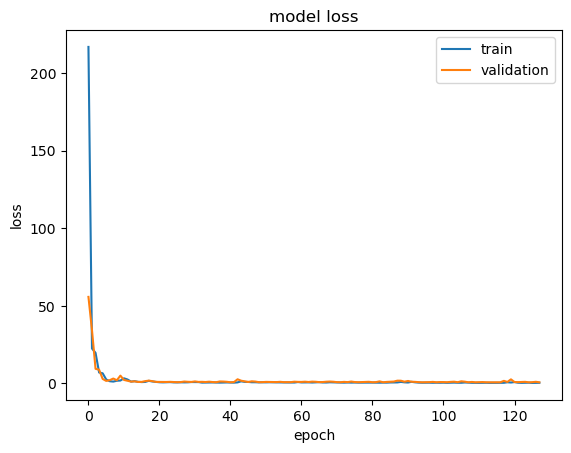

In [8]:
### write your code here to plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**2 points**]

In [9]:
#### write your code to report overall accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

8/8 [==============================] - 0s 32ms/step - loss: 0.7384 - accuracy: 0.7269


What is the overall accuracy? [72.69%]

In [11]:
### write your code to report per-class accuracy
### you should have a list where index is the class label with value corresponding to accuracy for that class label

# class names
num_classes = 4
class_names = ['Black spot', 'canker', 'greening', 'healthy']

# Initialize counters as numpy arrays
correct_predictions = np.zeros(num_classes, dtype=int)
total_predictions = np.zeros(num_classes, dtype=int)

# calculate per-class accuracy
for i in range(len(test_images)):
  prediction = model.predict(test_images[i].reshape(1, 256, 256, 3))
  predicted_label = np.argmax(prediction)
  actual_label = test_labels[i]

  if predicted_label == actual_label:
    correct_predictions[actual_label] += 1
  total_predictions[actual_label] += 1

per_class_accuracy = correct_predictions / total_predictions

# print('Per-class accuracy:', per_class_accuracy)

# print per-class accuracy with class names correct to 2 decimal places
for i in range(num_classes):
  print(f'{class_names[i]}: {per_class_accuracy[i] * 100:.2f}%')





1/1 [==============================] - 0s 21ms/step
Black spot: 54.69%
canker: 85.48%
greening: 85.71%
healthy: 33.33%
